In [13]:
import cv2
import time
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math
from tkinter import *
from random import randint
import threading
from apscheduler.schedulers.background import BackgroundScheduler
from threading import Event, Thread



timer = None
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier("model/keras_model.h5", "model/labels.txt")
 
offset = 20
imgSize = 300
 
labels = ["A", "B", "C"]
sched = BackgroundScheduler()
text = ''

def predict(*args):
    
    global pred, timer
    pred = True
    time.sleep(0.05)
    pred = False
    timer = threading.Timer(2, predict)
    timer.start()    

predict()    
            
while True:
    
#     global hands, imgOutput, out, img, aspectRatio, imgCrop, imgWhite
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    out = img.copy()
    
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h / w

#         cv2.rectangle(imgOutput, (x - offset, y - offset-50),(x - offset+90, y - offset-50+50), (255, 0, 255), cv2.FILLED)
#         cv2.putText(imgOutput, labels[index], (x, y -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)

        cv2.rectangle(imgOutput, (x-offset, y-offset),(x + w+offset, y + h+offset), (0, 0, 255), cv2.FILLED)
        cv2.putText(out, text, (50,100), cv2.FONT_HERSHEY_COMPLEX, 1.7, (0, 0, 255), 3)
    
    if pred and hands:
        alpha = 0.01
        mask = imgOutput.astype(bool)
        out[mask] = cv2.addWeighted(img, alpha, imgOutput, 1 - alpha, 0)[mask]
        cv2.imshow("ImageO", out)

        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)

        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)


        def update(text):
            if labels[index] in 'ADEFGHIJKLMNOPQRSTUVWXYZ':
                text = text+labels[index]
            elif labels[index] == 'B' and text:
                text = text[:-1]
            elif labels[index] == 'C':
                text = text+' '

            return text

        text = update(text)    
                     
    else:    
        cv2.imshow("ImageO", out)
        
    k = cv2.waitKey(5)
    if k == ord('q'):
        timer.cancel()
        break
        
        
cap.release()
cv2.destroyAllWindows()   

1/1 [==============================] - 0s 23ms/step


In [19]:
# note that there are many other schedulers available
from apscheduler.schedulers.background import BackgroundScheduler

sched = BackgroundScheduler()

def some_job():
    print('Every 10 seconds')

# seconds can be replaced with minutes, hours, or days
sched.add_job(some_job, 'interval', seconds=10)
sched.start()

...

sched.shutdown()

Every 10 seconds
Every 10 seconds
Every 10 seconds
Every 10 seconds


In [21]:
import time
from threading import Event, Thread

class RepeatedTimer:

    """Repeat `function` every `interval` seconds."""

    def __init__(self, interval, function, *args, **kwargs):
        self.interval = interval
        self.function = function
        self.args = args
        self.kwargs = kwargs
        self.start = time.time()
        self.event = Event()
        self.thread = Thread(target=self._target)
        self.thread.start()

    def _target(self):
        while not self.event.wait(self._time):
            self.function(*self.args, **self.kwargs)

    @property
    def _time(self):
        return self.interval - ((time.time() - self.start) % self.interval)

    def stop(self):
        self.event.set()
        self.thread.join()


# start timer
timer = RepeatedTimer(10, print, 'Hello world')

# stop timer
timer.stop()

Every 10 seconds
Every 10 seconds
Every 10 seconds
Every 10 seconds


In [3]:
import cv2
import time
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math
from tkinter import *
from random import randint
import threading
from pynput.keyboard import Key, Controller
 
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier("model/keras_model.h5", "model/labels.txt")

keyboard = Controller()

offset = 20
imgSize = 300
 
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'DELETE', 'SPACE', 'CLEAR']
text = ''

t = None

def press():
    global t
    keyboard.press('s')
    keyboard.release('s') 
    t = threading.Timer(2, press)
    t.start()
    
press()

while True:
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    out = img.copy()
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h / w

#         cv2.rectangle(imgOutput, (x - offset, y - offset-50),(x - offset+90, y - offset-50+50), (255, 0, 255), cv2.FILLED)
#         cv2.putText(imgOutput, labels[index], (x, y -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)

        cv2.rectangle(imgOutput, (x-offset, y-offset),(x + w+offset, y + h+offset), (0, 0, 255), cv2.FILLED)
        cv2.putText(out, text, (50,100), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)
                
    key = cv2.waitKey(5)
     
    if key == ord('s') and hands:
        
        alpha = 0.01
        mask = imgOutput.astype(bool)
        out[mask] = cv2.addWeighted(img, alpha, imgOutput, 1 - alpha, 0)[mask]
        cv2.imshow("ImageO", out)
        
        
        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
            cv2.imshow('imagewhite', imgWhite)
            prediction, index = classifier.getPrediction(imgWhite, draw=False)

        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize
            cv2.imshow('imagewhite', imgWhite)
            prediction, index = classifier.getPrediction(imgWhite, draw=False)
        
        
        def update(text):
            if labels[index] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
                text = text+labels[index]
            elif labels[index] == 'DELETE' and text:
                text = text[:-1]
            elif labels[index] == 'SPACE':
                text = text+' '
            elif labels[index] == 'CLEAR':
                text = ''
            else:
                pass
                
            return text

        text = update(text)
        
    else:    
        cv2.imshow("ImageO", out)
        
    k = cv2.waitKey(5)
    if k == ord('q'):
        t.cancel()
        break
        
cap.release()
cv2.destroyAllWindows()   

1/1 [==============================] - 0s 29ms/step


In [1]:
from cvzone.HandTrackingModule import HandDetector

In [ ]:
c = HandDetector()

In [ ]:
import cv2
import streamlit as st

st.title("Webcam Live Feed")
run = st.checkbox('Run')
FRAME_WINDOW = st.image([])
camera = cv2.VideoCapture(0)

while run:
    _, frame = camera.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    FRAME_WINDOW.image(frame)
else:
    st.write('Stopped')

In [5]:
import random
import shutil
import os

In [25]:
for i in range(0,29):
        valid_samples = random.sample(os.listdir(f'Data/train/{i}'), 15)
        for j in valid_samples:
            shutil.move(f'Data/train/{i}/{j}', f'Data/valid/{i}')

In [26]:
for i in range(0,29):
        test_samples = random.sample(os.listdir(f'Data/train/{i}'), 5)
        for j in test_samples:
            shutil.move(f'Data/train/{i}/{j}', f'Data/test/{i}')

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [3]:
BATCH_SIZE = 5
IMG_SIZE = (300, 300)

In [4]:
train_dir = 'Data/train'
validation_dir = 'Data/valid'
test_dir = 'Data/test'

In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 2320 files belonging to 29 classes.


In [6]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 435 files belonging to 29 classes.


In [7]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 145 files belonging to 29 classes.


In [141]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 87
Number of test batches: 29


In [142]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [143]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.1),
])

In [144]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
# Note: Alternatively, you could rescale pixel values from [0, 255] to [-1, 1] using tf.keras.layers.Rescaling.

In [145]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [146]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [147]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(5, 10, 10, 1280)


In [148]:
base_model.trainable = False

In [149]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 150, 150, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 150, 150, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 75, 75, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 77, 77, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 38, 38, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 38, 38, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 19, 19, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 19, 19, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 19, 19, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 19, 19, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 19, 19, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 19, 19, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 19, 19, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 19, 19, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 10, 10, 960)  8640       ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 10, 10, 960)  3840       ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 10, 10, 960)  0          ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 10, 10, 160)  153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [150]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(5, 1280)


In [151]:
prediction_layer = tf.keras.layers.Dense(units=29, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(5, 29)


In [161]:
inputs = tf.keras.Input(shape=(300, 300, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [162]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [163]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 300, 300, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 300, 300, 3)       0         
                                                                 
 tf.math.truediv_4 (TFOpLamb  (None, 300, 300, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_4 (TFOpLam  (None, 300, 300, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 10, 10, 1280)     2257984   
 ional)                                                          
                                                           

In [164]:
len(model.trainable_variables)

2

In [165]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

87/87 [==============================] - 15s 156ms/step - loss: 3.5720 - accuracy: 0.0253


In [166]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
464/464 [==============================] - 94s 193ms/step - loss: 3.0112 - accuracy: 0.1802 - val_loss: 2.5049 - val_accuracy: 0.4253
Epoch 2/10
464/464 [==============================] - 93s 201ms/step - loss: 2.1993 - accuracy: 0.5159 - val_loss: 1.8759 - val_accuracy: 0.7149
Epoch 3/10
464/464 [==============================] - 99s 213ms/step - loss: 1.6630 - accuracy: 0.7267 - val_loss: 1.4642 - val_accuracy: 0.7977
Epoch 4/10
464/464 [==============================] - 104s 223ms/step - loss: 1.2937 - accuracy: 0.8129 - val_loss: 1.1757 - val_accuracy: 0.8575
Epoch 5/10
464/464 [==============================] - 100s 215ms/step - loss: 1.0419 - accuracy: 0.8703 - val_loss: 0.9834 - val_accuracy: 0.8713
Epoch 6/10
464/464 [==============================] - 92s 197ms/step - loss: 0.8666 - accuracy: 0.9013 - val_loss: 0.8375 - val_accuracy: 0.8874
Epoch 7/10
464/464 [==============================] - 89s 192ms/step - loss: 0.7414 - accuracy: 0.9159 - val_loss: 0.7273 - val_

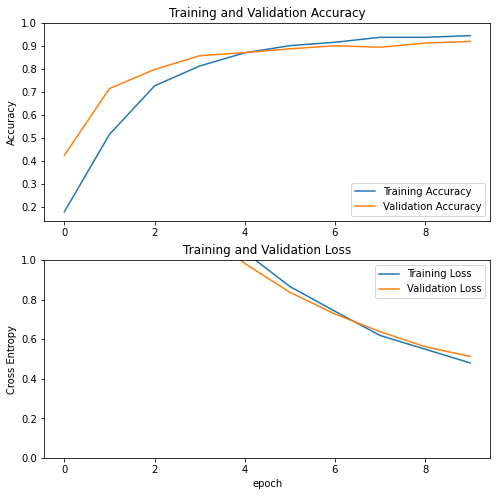

In [176]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [177]:
model.save('transferlearn.h5')

In [178]:
base_model.trainable = True

In [179]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  154


In [180]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [181]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 300, 300, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 300, 300, 3)       0         
                                                                 
 tf.math.truediv_4 (TFOpLamb  (None, 300, 300, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_4 (TFOpLam  (None, 300, 300, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 10, 10, 1280)     2257984   
 ional)                                                          
                                                           

In [182]:
len(model.trainable_variables)

56

In [183]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
464/464 [==============================] - 144s 296ms/step - loss: 0.1818 - accuracy: 0.9552 - val_loss: 0.1753 - val_accuracy: 0.9494
Epoch 11/20
464/464 [==============================] - 136s 293ms/step - loss: 0.1079 - accuracy: 0.9746 - val_loss: 0.1213 - val_accuracy: 0.9655
Epoch 12/20
464/464 [==============================] - 136s 294ms/step - loss: 0.0652 - accuracy: 0.9828 - val_loss: 0.0848 - val_accuracy: 0.9793
Epoch 13/20
464/464 [==============================] - 142s 305ms/step - loss: 0.0464 - accuracy: 0.9866 - val_loss: 0.0444 - val_accuracy: 0.9839
Epoch 14/20
464/464 [==============================] - 146s 314ms/step - loss: 0.0312 - accuracy: 0.9927 - val_loss: 0.0480 - val_accuracy: 0.9839
Epoch 15/20
464/464 [==============================] - 136s 293ms/step - loss: 0.0218 - accuracy: 0.9944 - val_loss: 0.0362 - val_accuracy: 0.9862
Epoch 16/20
464/464 [==============================] - 161s 347ms/step - loss: 0.0253 - accuracy: 0.9931 - val_loss: 0

In [184]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

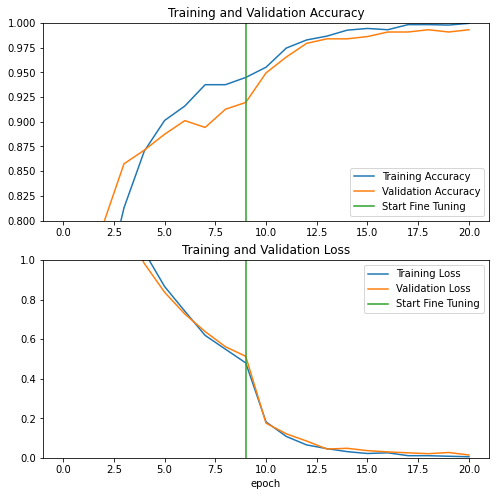

In [185]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [186]:
model.save('finetuned.h5')

In [187]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

29/29 [==============================] - 5s 157ms/step - loss: 0.0064 - accuracy: 1.0000
Test accuracy : 1.0


In [189]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [15 19 10 24 22]


In [167]:
# mobile = tf.keras.applications.MobileNet(input_shape=(300,300,3),include_top=False)

In [168]:
# mobile = tf.keras.applications.MobileNet()

In [169]:
# mobile.summary()

In [170]:
# x = mobile.layers[-1].output
# y = tf.reshape(x, shape=(-1, 1024))
# output = Dense(units=29, activation='softmax')(y)

In [171]:
# model = tf.keras.Model(inputs=mobile.input, outputs=output)

In [172]:
# len(model.layers)

In [173]:
# for layer in model.layers[:-23]:
#     layer.trainable = False

In [174]:
# model.summary()

In [80]:
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [175]:
# model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

In [9]:
test_labels = test_dataset.class_names

In [10]:
test_labels

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [12]:
model = tf.keras.models.load_model('mobilemodel/finetuned.h5')

In [14]:
pred = model.predict(x=test_dataset, verbose=0)

In [23]:
pred.shape

(145, 29)

In [24]:
ls = []
for i in range(145):
    ls.append(np.argmax(pred[i]))

In [25]:
ls

[17,
 8,
 4,
 1,
 21,
 17,
 21,
 23,
 1,
 14,
 11,
 25,
 17,
 5,
 9,
 7,
 18,
 20,
 14,
 26,
 21,
 5,
 23,
 16,
 18,
 0,
 3,
 17,
 12,
 10,
 8,
 24,
 7,
 14,
 10,
 9,
 5,
 20,
 8,
 13,
 28,
 24,
 8,
 5,
 2,
 28,
 16,
 5,
 3,
 19,
 0,
 6,
 24,
 22,
 23,
 19,
 19,
 19,
 9,
 13,
 10,
 0,
 0,
 25,
 22,
 15,
 10,
 26,
 13,
 12,
 2,
 6,
 28,
 2,
 16,
 20,
 26,
 16,
 25,
 11,
 4,
 1,
 17,
 3,
 15,
 27,
 24,
 28,
 3,
 0,
 7,
 27,
 11,
 15,
 13,
 8,
 12,
 20,
 6,
 13,
 22,
 23,
 9,
 1,
 22,
 9,
 3,
 4,
 18,
 23,
 2,
 6,
 14,
 25,
 18,
 27,
 21,
 7,
 26,
 15,
 18,
 11,
 24,
 19,
 25,
 12,
 6,
 11,
 22,
 4,
 27,
 4,
 7,
 12,
 20,
 21,
 27,
 1,
 26,
 14,
 2,
 16,
 10,
 15,
 28]

In [ ]:
disp = ConfusionMatrixDisplay(cm, display_labels= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [ ]:
%matplotlib inline

disp.plot()

# disp.plot(cmap = plt.cm.Blues)

In [ ]:
model.save('hand_write_digit.h5')

In [ ]:
import numpy as np
import cv2 as cv
from skimage import img_as_ubyte    
from skimage.color import rgb2gray
from keras.models import load_model


classifier = tf.keras.models.load_model('hand_write_digit.h5')

cap = cv.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)
cap.set(10,150)


while True: 
    
    _, frame = cap.read()
    
    crop_img = frame[10:234, 100:334]
    
    img_c = cv.cvtColor(crop_img, cv.COLOR_BGR2RGB) # importent
        
    re_sized=cv.resize(img_c,(224,224))
    normalized=re_sized/255.0
    reshaped=np.reshape(normalized,(1,224,224,3))
    reshaped = np.vstack([reshaped])
    
    pred = model.predict(reshaped)
    a = np.argmax(pred,axis=1)[0]

    cv.rectangle(frame,(10,100),(234, 334),(0,255,0),2)
    cv.putText(frame,'Predicted Gesture : ' + str(a),
                    (50,50),cv.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)
    cv.imshow("Original Image",frame)

    #cv.imshow('O/P', frame)
    
    key = cv.waitKey(1)
    if key == 27:
        break

cap.release()        
cv.destroyAllWindows()

In [2]:
import cv2
import time
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math
from tkinter import *
from random import randint
import threading
from pynput.keyboard import Key, Controller
import tensorflow as tf
 
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = tf.keras.models.load_model('mobilemodel/finetuned.h5')

keyboard = Controller()

offset = 20
imgSize = 300
 
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'DELETE', 'SPACE', 'CLEAR']
text = ''

t = None

def press():
    global t
    keyboard.press('s')
    keyboard.release('s') 
    t = threading.Timer(2, press)
    t.start()
    
press()

while True:
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    out = img.copy()
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h / w

#         cv2.rectangle(imgOutput, (x - offset, y - offset-50),(x - offset+90, y - offset-50+50), (255, 0, 255), cv2.FILLED)
#         cv2.putText(imgOutput, labels[index], (x, y -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)

        cv2.rectangle(imgOutput, (x-offset, y-offset),(x + w+offset, y + h+offset), (0, 0, 255), cv2.FILLED)
        cv2.putText(out, text, (50,100), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)
                
    key = cv2.waitKey(5)
     
    if key == ord('s') and hands:
        
        alpha = 0.01
        mask = imgOutput.astype(bool)
        out[mask] = cv2.addWeighted(img, alpha, imgOutput, 1 - alpha, 0)[mask]
        cv2.imshow("ImageO", out)
        
        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
            
            reshaped=np.reshape(imgWhite,(1,300,300,3))
            reshaped = np.vstack([reshaped])

            prediction = classifier.predict(reshaped)
            index = np.argmax(prediction)


        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize
            
            reshaped=np.reshape(imgWhite,(1,300,300,3))
            reshaped = np.vstack([reshaped])
            
            prediction = classifier.predict(reshaped)
            index = np.argmax(prediction)
        
        
        def update(text):
            if labels[index] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
                text = text+labels[index]
            elif labels[index] == 'DELETE' and text:
                text = text[:-1]
            elif labels[index] == 'SPACE':
                text = text+' '
            elif labels[index] == 'CLEAR':
                text = ''
            else:
                pass
                
            return text

        text = update(text)
        
    else:    
        cv2.imshow("ImageO", out)
        
    k = cv2.waitKey(5)
    if k == ord('q'):
        t.cancel()
        break
        
cap.release()
cv2.destroyAllWindows()   

1/1 [==============================] - 0s 48ms/step
